# **Artficial Neural Networks on Sleep Stage Prediction Model**

# **Author - Jibitesh Chakraborty**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

In [70]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Reading Raw EEG Signals and Annotations**

In [71]:
raw = mne.io.read_raw_edf('./drive/MyDrive/CNN/SC4001E0-PSG (4).edf')
annot = mne.read_annotations('./drive/MyDrive/CNN/SC4001EC-Hypnogram (1).edf')
raw.set_annotations(annot,emit_warning=False)

Extracting EDF parameters from /content/drive/MyDrive/CNN/SC4001E0-PSG (4).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG (4).edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

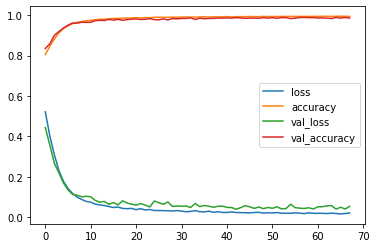

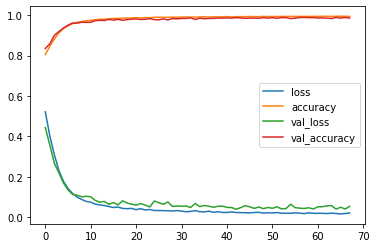

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


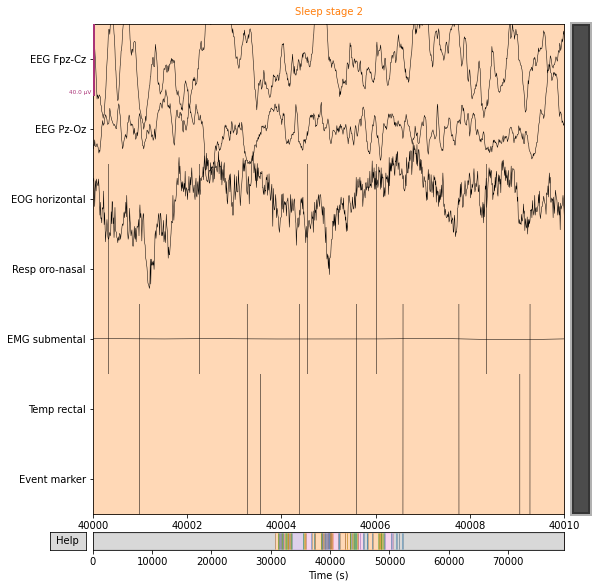

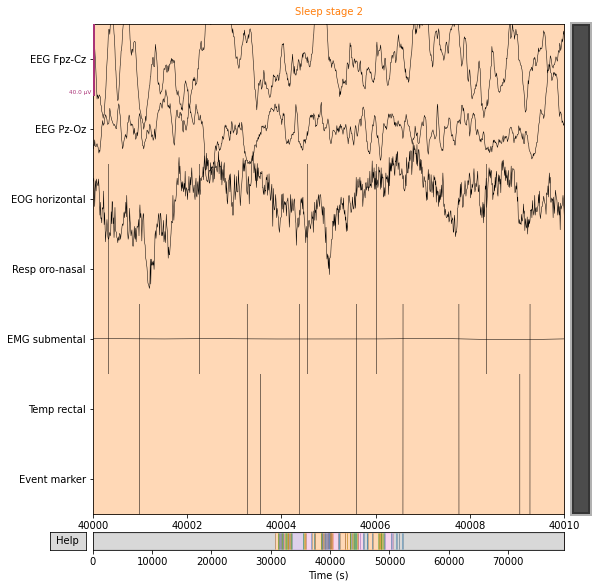

In [72]:
raw.plot(start=40000,duration=10)

In [73]:
data = raw.get_data()
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [74]:
annot_df = annot.to_data_frame()
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


# **Data Preprocessing**

In [75]:
annot_df.groupby(['description']).sum()

,duration
description,
Sleep stage 1,1740.0
Sleep stage 2,7500.0
Sleep stage 3,3030.0
Sleep stage 4,3570.0
Sleep stage ?,6900.0
Sleep stage R,3750.0
Sleep stage W,59910.0


In [76]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1,'Movement time':-1}
annot_df['description'] = annot_df['description'].replace(label)
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [77]:
annot_df.groupby(['description']).sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [78]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = int(annot_df.iloc[i,2])
    for j in range(0,dur):
        annot_list.append(des)

In [79]:
cols = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=cols)
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [80]:
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


# **Normalizing**

In [81]:
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
0,79500.0,1.811138e-07,2.561919e-05,-0.000125,-0.000012,5.157509e-07,0.000013,0.000157
1,79500.0,-3.464879e-07,7.185456e-06,-0.000048,-0.000005,-4.520147e-07,0.000004,0.000056
2,79500.0,7.427894e-07,8.184781e-05,-0.000386,-0.000036,-2.463980e-07,0.000035,0.000445
3,79500.0,2.772545e+02,3.497052e+02,-907.900006,181.378693,2.211806e+02,317.617642,2015.034675
4,79500.0,3.422791e-06,7.126552e-08,0.000003,0.000003,3.422624e-06,0.000003,0.000004
5,79500.0,3.721832e+01,2.517206e-02,37.143711,37.200739,3.721811e+01,37.235538,37.325715
6,79500.0,8.896052e+02,5.765405e+01,-2.770382,879.616700,8.935192e+02,907.264523,1021.897795


In [82]:
def norm(X):
  return (X - df_stats['mean'])/df_stats['std']

df = norm(df)

# **Creating Model**

In [87]:
X = df.iloc[20000:60000].values
Y = annot_list.iloc[20000:60000].values

In [88]:
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [89]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y)

Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 42)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [92]:
X_train.shape

(30000, 7)

In [93]:
Y_train.shape

(30000, 5)

In [94]:
model = Sequential()

model.add(Dense(7))
model.add(Dense(210,activation='relu'))
model.add(Dense(280,activation='relu'))
model.add(Dense(140,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience=25)

In [96]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,callbacks=[earlystop])

Epoch 1/100
938/938 [==============================] - 5s 5ms/step - loss: 0.9462 - accuracy: 0.6136 - val_loss: 0.6940 - val_accuracy: 0.7176
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.6044 - accuracy: 0.7538 - val_loss: 0.5272 - val_accuracy: 0.7824
Epoch 3/100
938/938 [==============================] - 4s 4ms/step - loss: 0.4460 - accuracy: 0.8211 - val_loss: 0.3821 - val_accuracy: 0.8454
Epoch 4/100
938/938 [==============================] - 4s 4ms/step - loss: 0.3227 - accuracy: 0.8781 - val_loss: 0.2840 - val_accuracy: 0.8958
Epoch 5/100
938/938 [==============================] - 7s 8ms/step - loss: 0.2433 - accuracy: 0.9107 - val_loss: 0.2311 - val_accuracy: 0.9160
Epoch 6/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1946 - accuracy: 0.9302 - val_loss: 0.1865 - val_accuracy: 0.9357
Epoch 7/100
938/938 [==============================] - 4s 5ms/step - loss: 0.1568 - accuracy: 0.9452 - val_loss: 0.1547 - val_accuracy: 0.9457

In [97]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [98]:
Y_pred = np.round(model.predict(X_test))

313/313 [==============================] - 1s 2ms/step


In [99]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5145
           1       0.96      0.97      0.96       420
           2       0.97      0.95      0.96      1802
           3       0.98      0.97      0.98      1690
           4       0.97      0.99      0.98       943

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Saving Model**

In [100]:
model.save('./drive/MyDrive/CNN/SleepStage.h5')